In [1]:
#import needed libraries & float format definition

# import unicodecsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm

pd.options.display.float_format = '{:.2f}'.format
# Reading and showing head data
flights = pd.read_csv("flights.csv")
flights.head(100)

c:\Users\neelk\anaconda3\envs\cis545\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.00,-22.00,0,0,NaN,nan,nan,nan,nan,nan
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.00,-9.00,0,0,NaN,nan,nan,nan,nan,nan
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.00,5.00,0,0,NaN,nan,nan,nan,nan,nan
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.00,-9.00,0,0,NaN,nan,nan,nan,nan,nan
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.00,-21.00,0,0,NaN,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015,1,1,4,B6,2001,N358JB,BUF,JFK,535,...,648.00,-15.00,0,0,NaN,nan,nan,nan,nan,nan
96,2015,1,1,4,B6,2807,N190JB,PWM,JFK,535,...,635.00,-25.00,0,0,NaN,nan,nan,nan,nan,nan
97,2015,1,1,4,B6,2023,N324JB,JFK,SJU,535,...,1039.00,19.00,0,0,NaN,0.00,0.00,19.00,0.00,0.00
98,2015,1,1,4,EV,4557,N12967,CRP,IAH,535,...,615.00,-21.00,0,0,NaN,nan,nan,nan,nan,nan


In [2]:
route_counts = pd.read_csv("Kmeanscluster_20years.csv")

In [3]:
route_counts=route_counts.rename(columns={'Origin_airport': 'ORIGIN_AIRPORT', 'Destination_airport': 'DESTINATION_AIRPORT'})


In [4]:
merged_df = pd.merge(flights, route_counts[['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'KMeansCluster']], on=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], how='left')

In [5]:
merged_df['KMeansCluster'].fillna(100, inplace=True)

In [6]:
merged_df['KMeansCluster'].unique()

array([  1.,   0.,   2.,   6.,   5., 100.,   4.,   3.])

In [7]:
merged_df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'KMeansCluster'],
      dtype='object')

We understand that, the scheduled_time column keeps time of departure in numeric format, for example 3:40 is converted to 340. Now we transform it to minutes from 00:00


In [8]:
merged_df['DEPARTURE_TIME'].fillna(0,inplace=True)
merged_df['ARRIVAL_TIME'].fillna(0,inplace=True)
merged_df['WHEELS_OFF'].fillna(0,inplace=True)
merged_df['WHEELS_ON'].fillna(0,inplace=True)

In [9]:
merged_df['DEPARTURE_TIME']=round(merged_df['DEPARTURE_TIME']/100,0)*60 + merged_df['DEPARTURE_TIME']%100
merged_df['WHEELS_OFF_FROM_DEP']=merged_df['DEPARTURE_TIME'] - round(merged_df['WHEELS_OFF']/100,0)*60 + merged_df['WHEELS_OFF']%100

merged_df['ARRIVAL_TIME']=round(merged_df['ARRIVAL_TIME']/100,0)*60 + merged_df['ARRIVAL_TIME']%100
merged_df['WHEELS_ON_FROM_ARR']= round(merged_df['WHEELS_ON']/100,0)*60 + merged_df['WHEELS_ON']%100 - merged_df['ARRIVAL_TIME']



In [10]:
for dataset in merged_df:
    merged_df.loc[merged_df['ARRIVAL_DELAY'] <= 15, 'Status'] = 0
    merged_df.loc[merged_df['ARRIVAL_DELAY'] >= 15, 'Status'] = 1
    merged_df.loc[merged_df['ARRIVAL_DELAY'] >= 60, 'Status'] = 2
    merged_df.loc[merged_df['DIVERTED'] == 1, 'Status'] = 3
    merged_df.loc[merged_df['CANCELLED'] == 1, 'Status'] = 4
    
    

In [11]:
merged_df.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF                   0
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
KMeansCluster                0
WHEELS_O

In [12]:
df = merged_df.drop(['ARRIVAL_TIME',  'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON','DEPARTURE_TIME', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DEPARTURE_DELAY',
       'YEAR','FLIGHT_NUMBER','TAIL_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE','SCHEDULED_TIME','MONTH','DAY','WHEELS_ON','WHEELS_OFF'],axis = 1)

In [13]:
df.columns

Index(['DAY_OF_WEEK', 'AIRLINE', 'TAXI_OUT', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'KMeansCluster',
       'WHEELS_OFF_FROM_DEP', 'WHEELS_ON_FROM_ARR', 'Status'],
      dtype='object')

In [14]:
df.fillna(0,inplace=True)

In [15]:
one_hot_encoded_weekday = pd.get_dummies(df['DAY_OF_WEEK'], prefix='WEEKDAY')
one_hot_encoded_month = pd.get_dummies(df['AIRLINE'], prefix='AIRLINE')

df = pd.concat([df, one_hot_encoded_weekday, one_hot_encoded_month], axis=1)
df.head()


,DAY_OF_WEEK,AIRLINE,TAXI_OUT,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL,KMeansCluster,WHEELS_OFF_FROM_DEP,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,4,AS,21.00,194.00,169.00,1448,4.00,430,1.00,1509.00,...,0,0,0,0,0,0,0,0,0,0
1,4,AA,12.00,279.00,263.00,2330,4.00,750,0.00,16.00,...,0,0,0,0,0,0,0,0,0,0
2,4,US,16.00,293.00,266.00,2296,11.00,806,2.00,52.00,...,0,0,0,0,0,0,0,1,0,0
3,4,AA,15.00,281.00,258.00,2342,8.00,805,6.00,45.00,...,0,0,0,0,0,0,0,0,0,0
4,4,AS,11.00,215.00,199.00,1448,5.00,320,1.00,59.00,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df = df.drop('AIRLINE', axis=1)
df.head()

,DAY_OF_WEEK,TAXI_OUT,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,SCHEDULED_ARRIVAL,KMeansCluster,WHEELS_OFF_FROM_DEP,WHEELS_ON_FROM_ARR,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,4,21.00,194.00,169.00,1448,4.00,430,1.00,1509.00,-4.00,...,0,0,0,0,0,0,0,0,0,0
1,4,12.00,279.00,263.00,2330,4.00,750,0.00,16.00,-4.00,...,0,0,0,0,0,0,0,0,0,0
2,4,16.00,293.00,266.00,2296,11.00,806,2.00,52.00,-11.00,...,0,0,0,0,0,0,0,1,0,0
3,4,15.00,281.00,258.00,2342,8.00,805,6.00,45.00,-68.00,...,0,0,0,0,0,0,0,0,0,0
4,4,11.00,215.00,199.00,1448,5.00,320,1.00,59.00,-5.00,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.isna().sum()

DAY_OF_WEEK            0
TAXI_OUT               0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
KMeansCluster          0
WHEELS_OFF_FROM_DEP    0
WHEELS_ON_FROM_ARR     0
Status                 0
WEEKDAY_1              0
WEEKDAY_2              0
WEEKDAY_3              0
WEEKDAY_4              0
WEEKDAY_5              0
WEEKDAY_6              0
WEEKDAY_7              0
AIRLINE_AA             0
AIRLINE_AS             0
AIRLINE_B6             0
AIRLINE_DL             0
AIRLINE_EV             0
AIRLINE_F9             0
AIRLINE_HA             0
AIRLINE_MQ             0
AIRLINE_NK             0
AIRLINE_OO             0
AIRLINE_UA             0
AIRLINE_US             0
AIRLINE_VX             0
AIRLINE_WN             0
dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
# Assuming df is your DataFrame with the specified columns

# Separate features and target variable
X = df.drop(['Status'], axis=1)
y = df['Status']
all_times = pd.to_datetime(merged_df[['YEAR', 'MONTH', 'DAY']])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_times, test_times, y_train, y_test = train_test_split(all_times, y, test_size=0.2, random_state=42)


models={}


In [47]:

# kmeans_clusters = df['KMeansCluster'].unique()
# for kmeans_cluster in kmeans_clusters:
#     # Create a mask for the current KMeansCluster
#     mask = (X_train['KMeansCluster'] == kmeans_cluster)
    
#     # Create models for Decision Tree and Logistic Regression
#     dt_model = DecisionTreeClassifier(random_state=42, criterion='gini', splitter='random', max_depth=20)
#     lr_model = LogisticRegression(random_state=42)
    
#     # Train the models
#     dt_model.fit(X_train[mask], y_train[mask])
#     lr_model.fit(X_train[mask], y_train[mask])
    
#     # Store the models in the dictionary
#     models[f'DT_KMeansCluster_{kmeans_cluster}'] = dt_model
#     models[f'LR_KMeansCluster_{kmeans_cluster}'] = lr_model

#         # Save the models to file
#     joblib.dump(dt_model, f'DT_KMeansCluster_{kmeans_cluster}_model.joblib')
#     joblib.dump(lr_model, f'LR_KMeansCluster_{kmeans_cluster}_model.joblib')



c:\Users\neelk\anaconda3\envs\cis545\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\neelk\anaconda3\envs\cis545\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

In [48]:


# dt_model_all = DecisionTreeClassifier(random_state=42, criterion='gini', splitter='random', max_depth=20)
# lr_model_all = LogisticRegression(random_state=42)
# dt_model_all.fit(X_train, y_train)
# lr_model_all.fit(X_train, y_train)
# models['DT_AllData'] = dt_model_all
# models['LR_AllData'] = lr_model_all

# joblib.dump(dt_model_all, 'DT_AllData_model.joblib')
# joblib.dump(lr_model_all, 'LR_AllData_model.joblib')



c:\Users\neelk\anaconda3\envs\cis545\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


['LR_AllData_model.joblib']

In [50]:
kmeans_clusters = df['KMeansCluster'].unique()

# Models for each KMeansCluster and the entire dataset
models = {}

# Iterate over each KMeansCluster and the entire dataset
for kmeans_cluster in kmeans_clusters:
    # Load the models from file
    dt_model_path = f'DT_KMeansCluster_{kmeans_cluster}_model.joblib'
    lr_model_path = f'LR_KMeansCluster_{kmeans_cluster}_model.joblib'
    
    dt_model = joblib.load(dt_model_path)
    lr_model = joblib.load(lr_model_path)
    
    
    # Store the models in the dictionary
    models[f'DT_KMeansCluster_{kmeans_cluster}'] = dt_model
    models[f'LR_KMeansCluster_{kmeans_cluster}'] = lr_model

# Load the models for the entire dataset
dt_model_all_path = 'DT_AllData_model.joblib'
lr_model_all_path = 'LR_AllData_model.joblib'

dt_model_all = joblib.load(dt_model_all_path)
lr_model_all = joblib.load(lr_model_all_path)

models['DT_AllData'] = dt_model_all
models['LR_AllData'] = lr_model_all

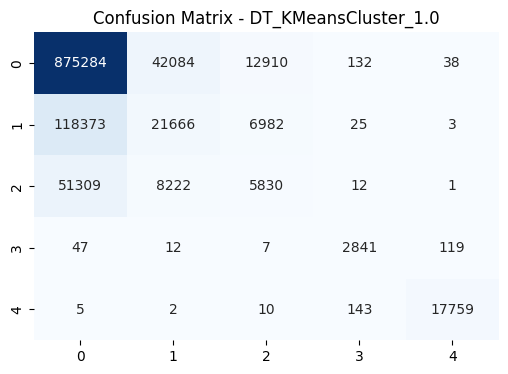


DT_KMeansCluster_1.0 Metrics:
Accuracy: 79.34%
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89    930448
         1.0       0.30      0.15      0.20    147049
         2.0       0.23      0.09      0.13     65374
         3.0       0.90      0.94      0.92      3026
         4.0       0.99      0.99      0.99     17919

    accuracy                           0.79   1163816
   macro avg       0.65      0.62      0.62   1163816
weighted avg       0.74      0.79      0.76   1163816

--------------------------------------


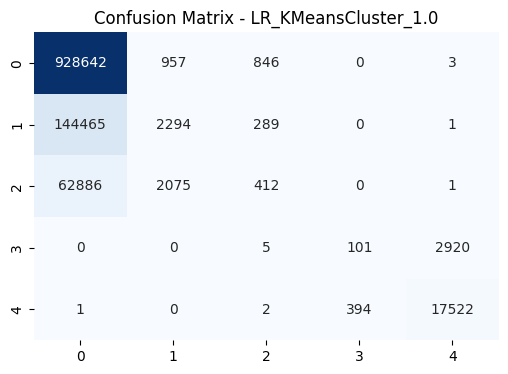


LR_KMeansCluster_1.0 Metrics:
Accuracy: 81.54%
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90    930448
         1.0       0.43      0.02      0.03    147049
         2.0       0.27      0.01      0.01     65374
         3.0       0.20      0.03      0.06      3026
         4.0       0.86      0.98      0.91     17919

    accuracy                           0.82   1163816
   macro avg       0.51      0.41      0.38   1163816
weighted avg       0.74      0.82      0.74   1163816

--------------------------------------


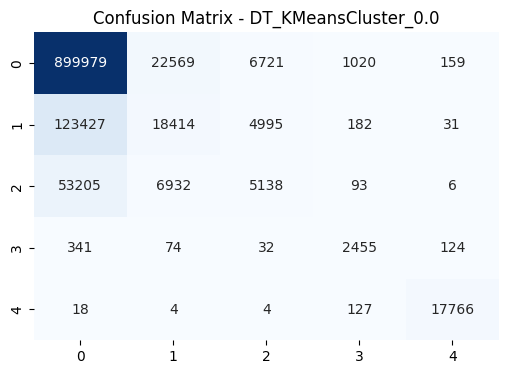


DT_KMeansCluster_0.0 Metrics:
Accuracy: 81.09%
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90    930448
         1.0       0.38      0.13      0.19    147049
         2.0       0.30      0.08      0.12     65374
         3.0       0.63      0.81      0.71      3026
         4.0       0.98      0.99      0.99     17919

    accuracy                           0.81   1163816
   macro avg       0.63      0.59      0.58   1163816
weighted avg       0.75      0.81      0.76   1163816

--------------------------------------


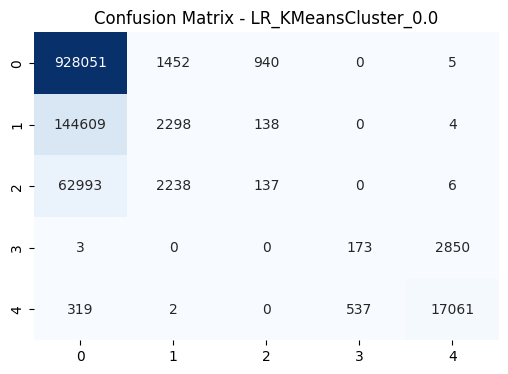


LR_KMeansCluster_0.0 Metrics:
Accuracy: 81.43%
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90    930448
         1.0       0.38      0.02      0.03    147049
         2.0       0.11      0.00      0.00     65374
         3.0       0.24      0.06      0.09      3026
         4.0       0.86      0.95      0.90     17919

    accuracy                           0.81   1163816
   macro avg       0.48      0.40      0.39   1163816
weighted avg       0.72      0.81      0.74   1163816

--------------------------------------


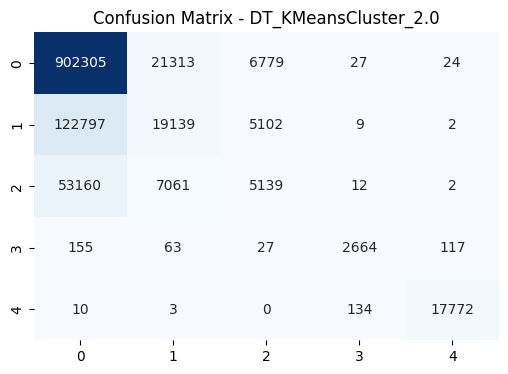


DT_KMeansCluster_2.0 Metrics:
Accuracy: 81.37%
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90    930448
         1.0       0.40      0.13      0.20    147049
         2.0       0.30      0.08      0.12     65374
         3.0       0.94      0.88      0.91      3026
         4.0       0.99      0.99      0.99     17919

    accuracy                           0.81   1163816
   macro avg       0.69      0.61      0.62   1163816
weighted avg       0.75      0.81      0.77   1163816

--------------------------------------


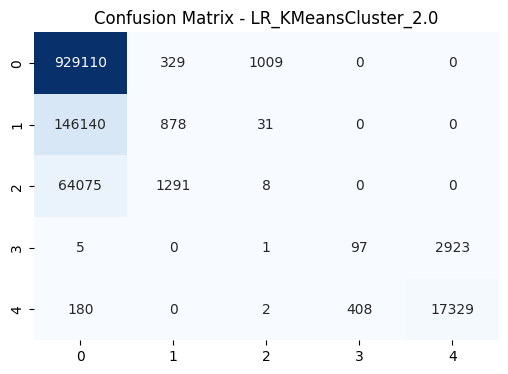


LR_KMeansCluster_2.0 Metrics:
Accuracy: 81.41%
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90    930448
         1.0       0.35      0.01      0.01    147049
         2.0       0.01      0.00      0.00     65374
         3.0       0.19      0.03      0.05      3026
         4.0       0.86      0.97      0.91     17919

    accuracy                           0.81   1163816
   macro avg       0.44      0.40      0.37   1163816
weighted avg       0.71      0.81      0.73   1163816

--------------------------------------


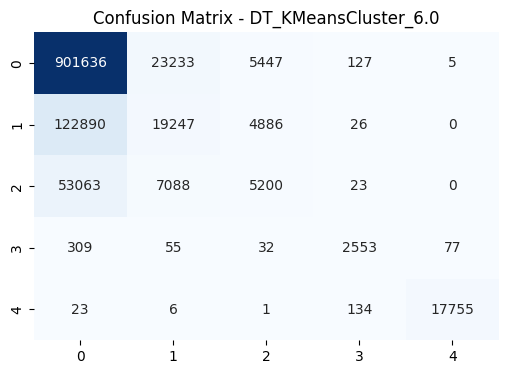


DT_KMeansCluster_6.0 Metrics:
Accuracy: 81.32%
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90    930448
         1.0       0.39      0.13      0.20    147049
         2.0       0.33      0.08      0.13     65374
         3.0       0.89      0.84      0.87      3026
         4.0       1.00      0.99      0.99     17919

    accuracy                           0.81   1163816
   macro avg       0.69      0.60      0.62   1163816
weighted avg       0.75      0.81      0.77   1163816

--------------------------------------


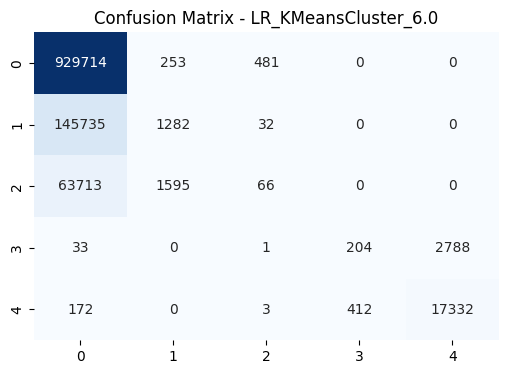


LR_KMeansCluster_6.0 Metrics:
Accuracy: 81.51%
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90    930448
         1.0       0.41      0.01      0.02    147049
         2.0       0.11      0.00      0.00     65374
         3.0       0.33      0.07      0.11      3026
         4.0       0.86      0.97      0.91     17919

    accuracy                           0.82   1163816
   macro avg       0.51      0.41      0.39   1163816
weighted avg       0.72      0.82      0.73   1163816

--------------------------------------


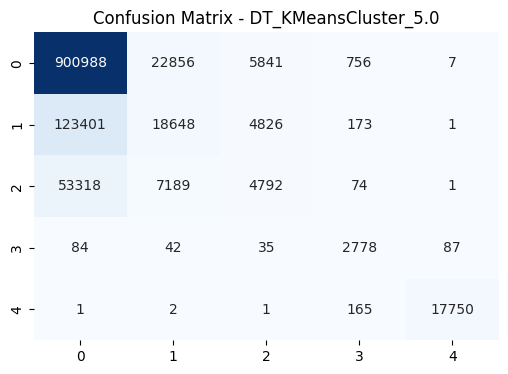


DT_KMeansCluster_5.0 Metrics:
Accuracy: 81.19%
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90    930448
         1.0       0.38      0.13      0.19    147049
         2.0       0.31      0.07      0.12     65374
         3.0       0.70      0.92      0.80      3026
         4.0       0.99      0.99      0.99     17919

    accuracy                           0.81   1163816
   macro avg       0.65      0.62      0.60   1163816
weighted avg       0.75      0.81      0.77   1163816

--------------------------------------


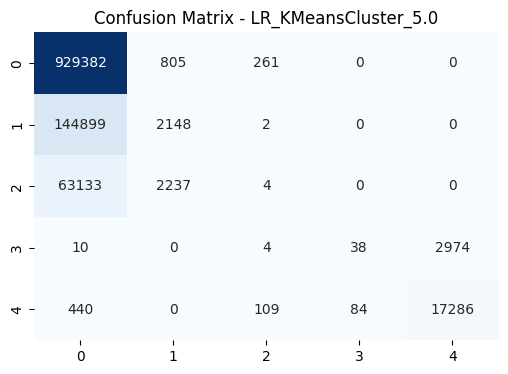


LR_KMeansCluster_5.0 Metrics:
Accuracy: 81.53%
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90    930448
         1.0       0.41      0.01      0.03    147049
         2.0       0.01      0.00      0.00     65374
         3.0       0.31      0.01      0.02      3026
         4.0       0.85      0.96      0.91     17919

    accuracy                           0.82   1163816
   macro avg       0.48      0.40      0.37   1163816
weighted avg       0.72      0.82      0.74   1163816

--------------------------------------


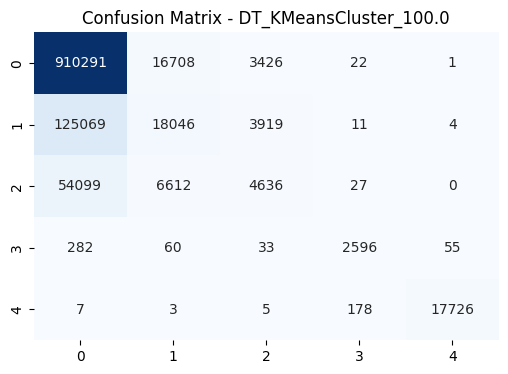


DT_KMeansCluster_100.0 Metrics:
Accuracy: 81.91%
              precision    recall  f1-score   support

         0.0       0.84      0.98      0.90    930448
         1.0       0.44      0.12      0.19    147049
         2.0       0.39      0.07      0.12     65374
         3.0       0.92      0.86      0.89      3026
         4.0       1.00      0.99      0.99     17919

    accuracy                           0.82   1163816
   macro avg       0.71      0.60      0.62   1163816
weighted avg       0.76      0.82      0.77   1163816

--------------------------------------


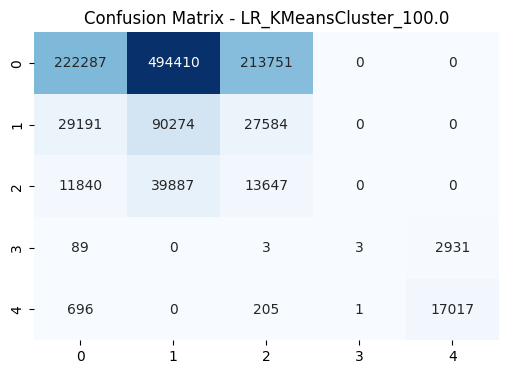


LR_KMeansCluster_100.0 Metrics:
Accuracy: 29.49%
              precision    recall  f1-score   support

         0.0       0.84      0.24      0.37    930448
         1.0       0.14      0.61      0.23    147049
         2.0       0.05      0.21      0.09     65374
         3.0       0.75      0.00      0.00      3026
         4.0       0.85      0.95      0.90     17919

    accuracy                           0.29   1163816
   macro avg       0.53      0.40      0.32   1163816
weighted avg       0.71      0.29      0.35   1163816

--------------------------------------


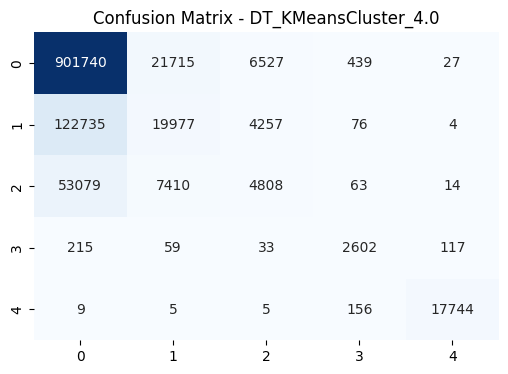


DT_KMeansCluster_4.0 Metrics:
Accuracy: 81.36%
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90    930448
         1.0       0.41      0.14      0.20    147049
         2.0       0.31      0.07      0.12     65374
         3.0       0.78      0.86      0.82      3026
         4.0       0.99      0.99      0.99     17919

    accuracy                           0.81   1163816
   macro avg       0.66      0.61      0.61   1163816
weighted avg       0.75      0.81      0.77   1163816

--------------------------------------


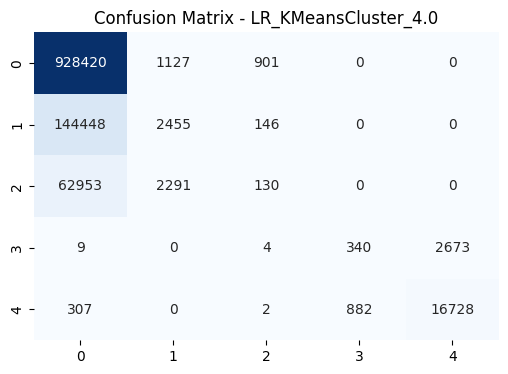


LR_KMeansCluster_4.0 Metrics:
Accuracy: 81.46%
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90    930448
         1.0       0.42      0.02      0.03    147049
         2.0       0.11      0.00      0.00     65374
         3.0       0.28      0.11      0.16      3026
         4.0       0.86      0.93      0.90     17919

    accuracy                           0.81   1163816
   macro avg       0.50      0.41      0.40   1163816
weighted avg       0.73      0.81      0.74   1163816

--------------------------------------


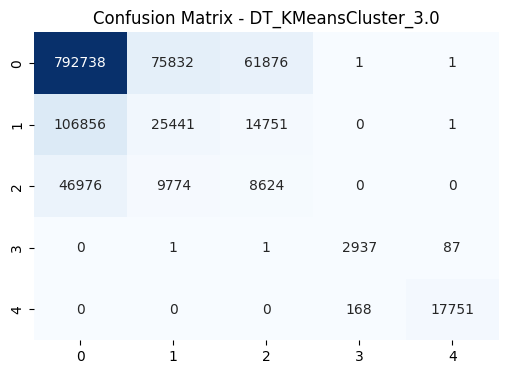


DT_KMeansCluster_3.0 Metrics:
Accuracy: 72.82%
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84    930448
         1.0       0.23      0.17      0.20    147049
         2.0       0.10      0.13      0.11     65374
         3.0       0.95      0.97      0.96      3026
         4.0       1.00      0.99      0.99     17919

    accuracy                           0.73   1163816
   macro avg       0.62      0.62      0.62   1163816
weighted avg       0.72      0.73      0.72   1163816

--------------------------------------


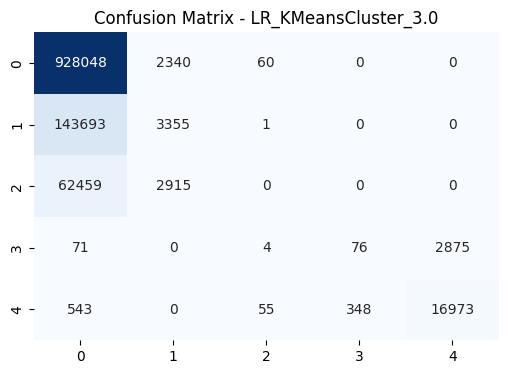


LR_KMeansCluster_3.0 Metrics:
Accuracy: 81.50%
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90    930448
         1.0       0.39      0.02      0.04    147049
         2.0       0.00      0.00      0.00     65374
         3.0       0.18      0.03      0.04      3026
         4.0       0.86      0.95      0.90     17919

    accuracy                           0.81   1163816
   macro avg       0.45      0.40      0.38   1163816
weighted avg       0.72      0.81      0.74   1163816

--------------------------------------


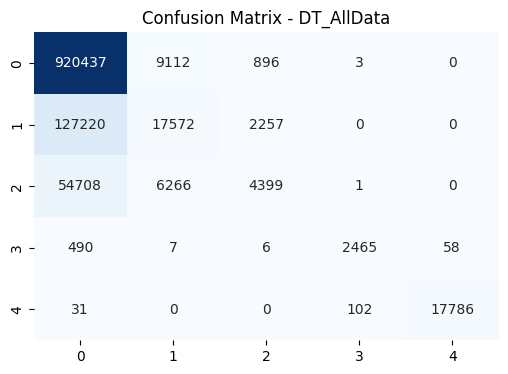


DT_AllData Metrics:
Accuracy: 82.72%
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.91    930448
         1.0       0.53      0.12      0.20    147049
         2.0       0.58      0.07      0.12     65374
         3.0       0.96      0.81      0.88      3026
         4.0       1.00      0.99      0.99     17919

    accuracy                           0.83   1163816
   macro avg       0.78      0.60      0.62   1163816
weighted avg       0.79      0.83      0.77   1163816

--------------------------------------


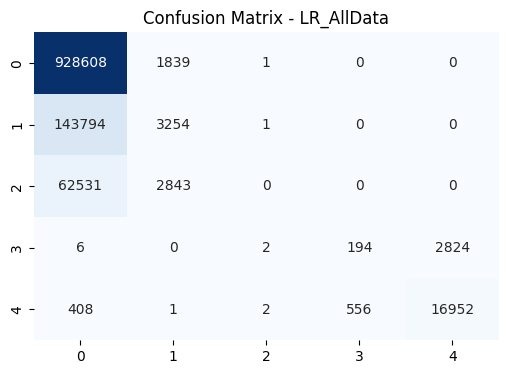


LR_AllData Metrics:
Accuracy: 81.54%
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90    930448
         1.0       0.41      0.02      0.04    147049
         2.0       0.00      0.00      0.00     65374
         3.0       0.26      0.06      0.10      3026
         4.0       0.86      0.95      0.90     17919

    accuracy                           0.82   1163816
   macro avg       0.47      0.41      0.39   1163816
weighted avg       0.72      0.82      0.74   1163816

--------------------------------------


In [51]:
# Evaluate models and display results
for model_name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification Report
    report = classification_report(y_test, y_pred)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    # Display metrics
    print(f'\n{model_name} Metrics:')
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(report)
    print('--------------------------------------')


Feature Importance for DT_AllData:
                Feature  Importance
1              TAXI_OUT        0.64
6     SCHEDULED_ARRIVAL        0.09
5               TAXI_IN        0.08
2          ELAPSED_TIME        0.05
3              AIR_TIME        0.03
4              DISTANCE        0.02
8   WHEELS_OFF_FROM_DEP        0.02
9    WHEELS_ON_FROM_ARR        0.02
20           AIRLINE_DL        0.01
30           AIRLINE_WN        0.01
7         KMeansCluster        0.01
25           AIRLINE_NK        0.01
19           AIRLINE_B6        0.00
13            WEEKDAY_4        0.00
22           AIRLINE_F9        0.00
17           AIRLINE_AA        0.00
15            WEEKDAY_6        0.00
14            WEEKDAY_5        0.00
12            WEEKDAY_3        0.00
11            WEEKDAY_2        0.00
10            WEEKDAY_1        0.00
16            WEEKDAY_7        0.00
0           DAY_OF_WEEK        0.00
18           AIRLINE_AS        0.00
28           AIRLINE_US        0.00
27           AIRLINE_UA     

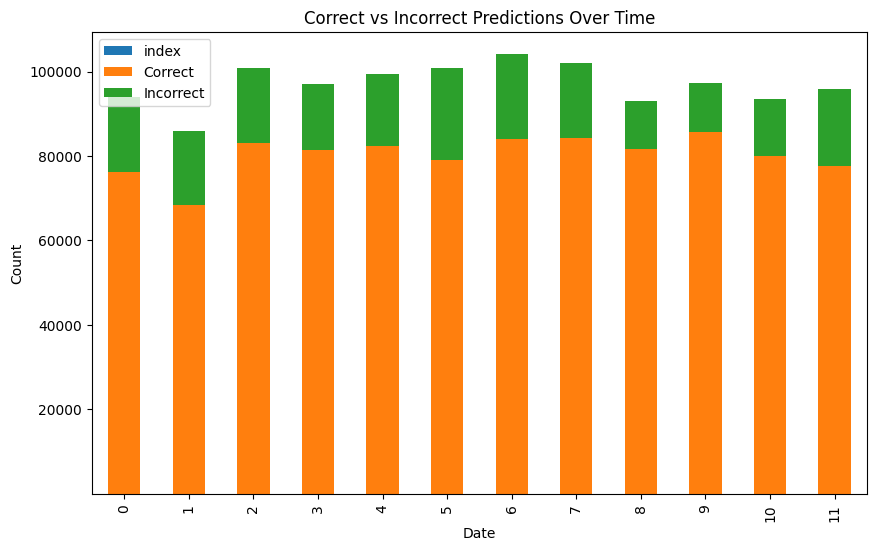

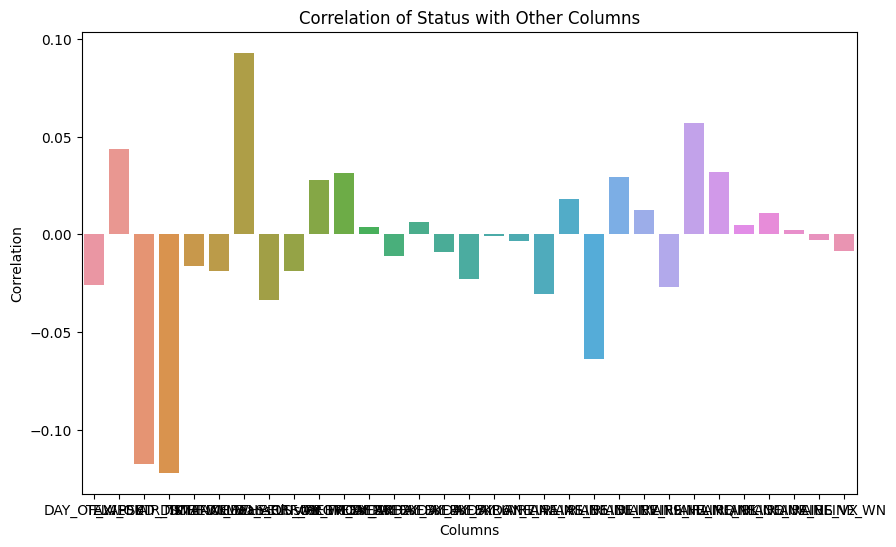


DT_AllData Metrics:
Accuracy: 82.81%
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.91    930438
         1.0       0.55      0.12      0.19    147624
         2.0       0.64      0.06      0.12     64782
         3.0       0.96      0.87      0.91      3039
         4.0       1.00      0.99      1.00     17933

    accuracy                           0.83   1163816
   macro avg       0.80      0.61      0.62   1163816
weighted avg       0.79      0.83      0.77   1163816

--------------------------------------

Coefficients for LR_AllData:
                Feature  Coefficient
3              AIR_TIME         0.03
2          ELAPSED_TIME         0.03
0           DAY_OF_WEEK         0.01
7         KMeansCluster         0.01
8   WHEELS_OFF_FROM_DEP         0.01
5               TAXI_IN         0.00
20           AIRLINE_DL         0.00
6     SCHEDULED_ARRIVAL         0.00
15            WEEKDAY_6         0.00
30           AIRLINE_WN         0.

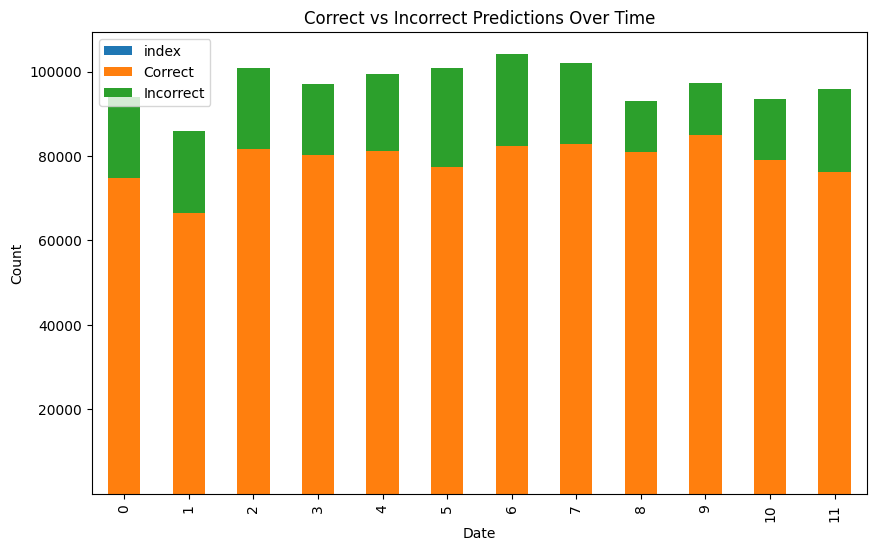

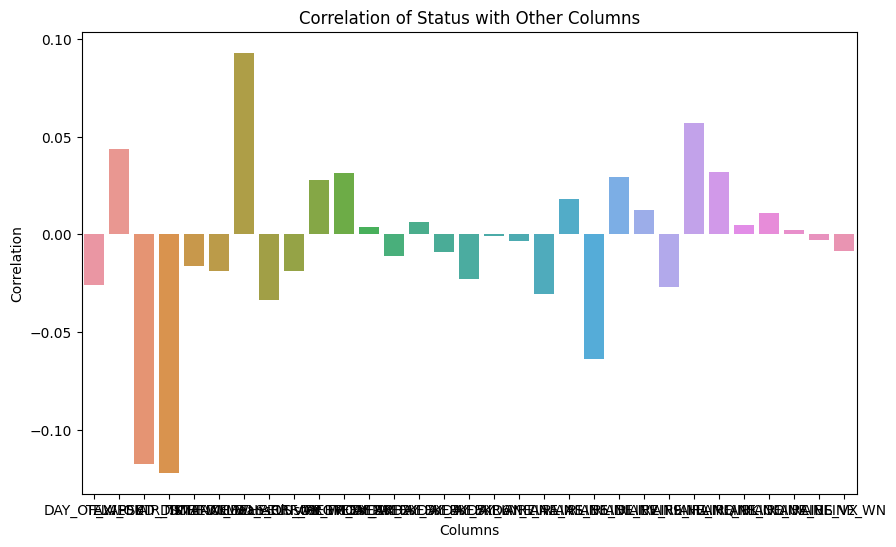


LR_AllData Metrics:
Accuracy: 81.46%
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90    930438
         1.0       0.38      0.02      0.04    147624
         2.0       0.00      0.00      0.00     64782
         3.0       0.23      0.06      0.10      3039
         4.0       0.86      0.94      0.90     17933

    accuracy                           0.81   1163816
   macro avg       0.46      0.40      0.39   1163816
weighted avg       0.72      0.81      0.74   1163816

--------------------------------------


In [21]:
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image 
import pydotplus


# Evaluate models and display results
for model_name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test)
    
    
    # Feature Importance for Decision Tree
    if 'DT' in model_name:
        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
        print(f'\nFeature Importance for {model_name}:')
        print(feature_importance)

    
    # Coefficients for Logistic Regression
    if 'LR' in model_name:
        coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
        coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
        print(f'\nCoefficients for {model_name}:')
        print(coefficients)
    
        # Create a DataFrame with actual and predicted values
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    
    # Group by day and calculate correct and incorrect predictions
    results_by_day = results_df.groupby(test_times.dt.month).apply(lambda x: pd.Series({
        'Correct': (x['Actual'] == x['Predicted']).sum(),
        'Incorrect': (x['Actual'] != x['Predicted']).sum()
    })).reset_index()
    
    # Plot stacked bar chart
    results_by_day.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Correct vs Incorrect Predictions Over Time')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.show()
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Display metrics
    print(f'\n{model_name} Metrics:')
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(report)
    print('--------------------------------------')


# Correlation Matrix
correlation_matrix = df.corr()
correlation_matrix = correlation_matrix['Status'].drop('Status')
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values)
plt.xticks(rotation=90)
plt.title('Correlation of Status with Other Columns')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.show()


Feature Importance for DT_AllData:
                Feature  Importance
1              TAXI_OUT        0.64
6     SCHEDULED_ARRIVAL        0.09
5               TAXI_IN        0.08
2          ELAPSED_TIME        0.05
3              AIR_TIME        0.03
4              DISTANCE        0.02
8   WHEELS_OFF_FROM_DEP        0.02
9    WHEELS_ON_FROM_ARR        0.02
20           AIRLINE_DL        0.01
30           AIRLINE_WN        0.01
7         KMeansCluster        0.01
25           AIRLINE_NK        0.01
19           AIRLINE_B6        0.00
13            WEEKDAY_4        0.00
22           AIRLINE_F9        0.00
17           AIRLINE_AA        0.00
15            WEEKDAY_6        0.00
14            WEEKDAY_5        0.00
12            WEEKDAY_3        0.00
11            WEEKDAY_2        0.00
10            WEEKDAY_1        0.00
16            WEEKDAY_7        0.00
0           DAY_OF_WEEK        0.00
18           AIRLINE_AS        0.00
28           AIRLINE_US        0.00
27           AIRLINE_UA     

c:\Users\neelk\anaconda3\envs\cis545\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

c:\Users\neelk\anaconda3\envs\cis545\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



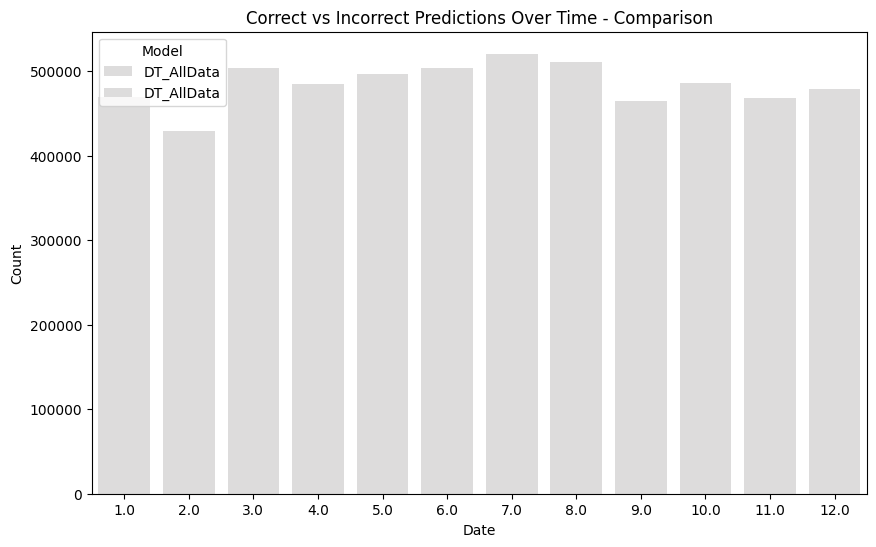

In [22]:
combined_results_df = pd.DataFrame()

# Evaluate models and display results
for model_name, model in models.items():
    # Predictions
    y_pred = model.predict(X)

    # Feature Importance for Decision Tree
    if 'DT' in model_name:
        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
        print(f'\nFeature Importance for {model_name}:')
        print(feature_importance)

    
    # Coefficients for Logistic Regression
    if 'LR' in model_name:
        coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
        coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
        print(f'\nCoefficients for {model_name}:')
        print(coefficients)

    # Metrics
    accuracy = accuracy_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    report = classification_report(y, y_pred)

    # Display metrics
    print(f'\n{model_name} Metrics:')
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(report)
    print('--------------------------------------')

    # Create a DataFrame with actual and predicted values for each model
    results_df = pd.DataFrame({'Actual': y, 'Predicted': y_pred, 'Model': model_name, 'date':all_times})

    # Append results to the combined DataFrame
    combined_results_df = combined_results_df.append(results_df, ignore_index=True)



In [ ]:
combined_results_df['Month'] = combined_results_df['date'].dt.month

# Map the actual and predicted values to 'Correct' and 'Incorrect'
combined_results_df['Result'] = combined_results_df.apply(lambda row: 'Correct' if row['Actual'] == row['Predicted'] else 'Incorrect', axis=1)

# Group by month, model, and result and count occurrences
results_by_month = combined_results_df.groupby(['Month', 'Model', 'Result']).size().unstack(fill_value=0).reset_index()

# Melt the DataFrame for better plotting
results_melted = pd.melt(results_by_month, id_vars=['Month', 'Model'], var_name='Result', value_name='Count')


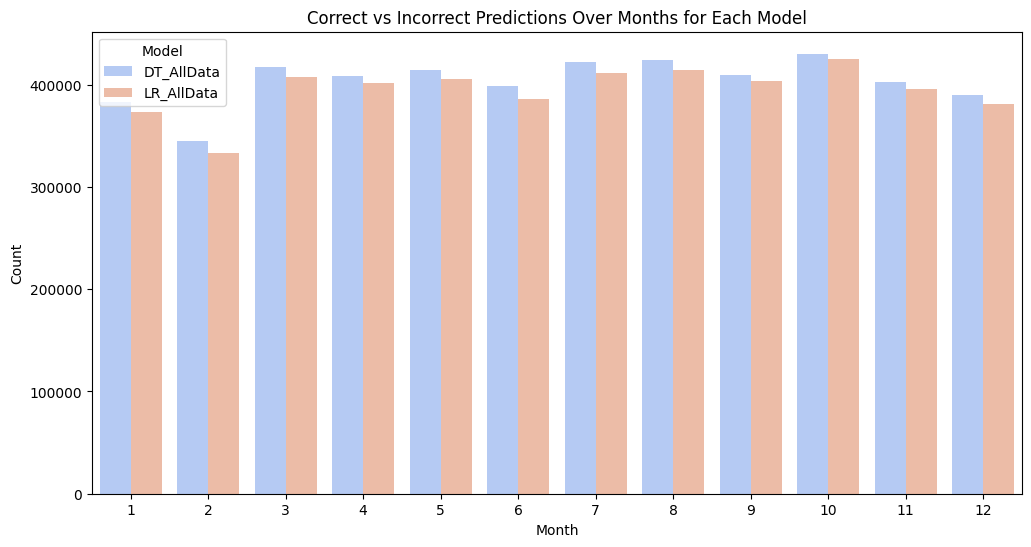

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Count', hue='Model', data=results_melted[results_melted['Result']=='Correct'], palette='coolwarm', dodge=True, hue_order=['DT_AllData', 'LR_AllData'],)

plt.title('Correct vs Incorrect Predictions Over Months for Each Model')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()